# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **X** - Temperatura Média (°C)
- **Y** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para carregar os pacotes e/ou fazer configurações para o projeto

In [40]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 4)

### Importe o dataset

#### <font color=red>Utilize o parâmetro **sep = ';'** da função **read.csv** para importar corretamente o conjunto de dados. O dataset do projeto utiliza como separador de colunas o caractere ';'.

In [53]:
dados = read.csv('data/dados_projeto.csv', sep = ';')

### Visualize o conteúdo do Data Frame

In [59]:
head(dados)

,Y,X
,<int>,<dbl>
1,25461,27.30
2,28972,27.02
3,30814,24.82
4,29799,23.98
5,28900,23.82
6,28218,23.78


### Obtenha e avalie as estatísticas descritivas dos dados

In [55]:
summary(dados)

       Y               X        
 Min.   :14343   Min.   :12.90  
 1st Qu.:22008   1st Qu.:19.02  
 Median :24867   Median :21.38  
 Mean   :25401   Mean   :21.23  
 3rd Qu.:28631   3rd Qu.:23.28  
 Max.   :37937   Max.   :28.86  

### Análise gráfica
### Construa um box plot para cada variável do dataset

In [ ]:
ggplot(dados, aes(y = Y)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = c('#3274A1', "orange")) + 
    coord_flip() +
    ylab("Consumo)") + 
    ggtitle('Box-plot') +
    theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

In [ ]:
ggplot(dados, aes(y = X)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = c('#3274A1', "orange")) + 
    coord_flip() +
    ylab("Consumo)") + 
    ggtitle('Box-plot') +
    theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

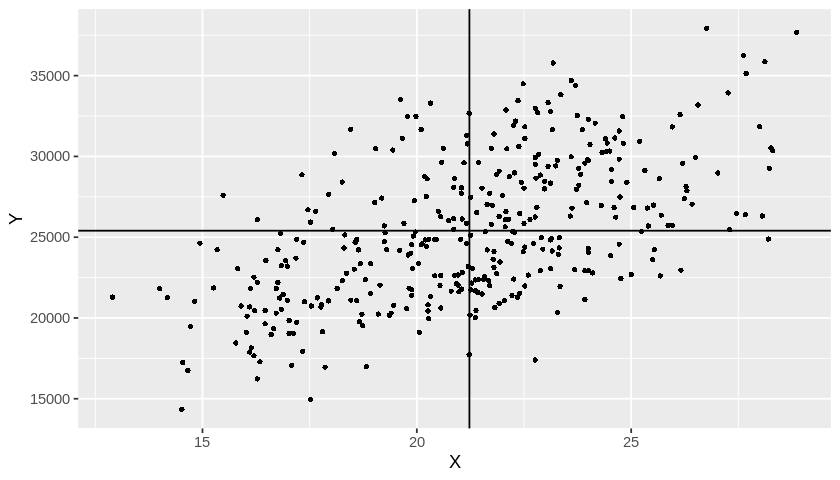

In [66]:
ggplot(data = dados, aes(x = X, y = Y)) + 
    geom_point(size = 1.5, stroke = 0) + 
geom_hline(yintercept = mean(dados$Y), color = 'black') + 
geom_vline(xintercept = mean(dados$X), color = 'black')


`geom_smooth()` using formula 'y ~ x'



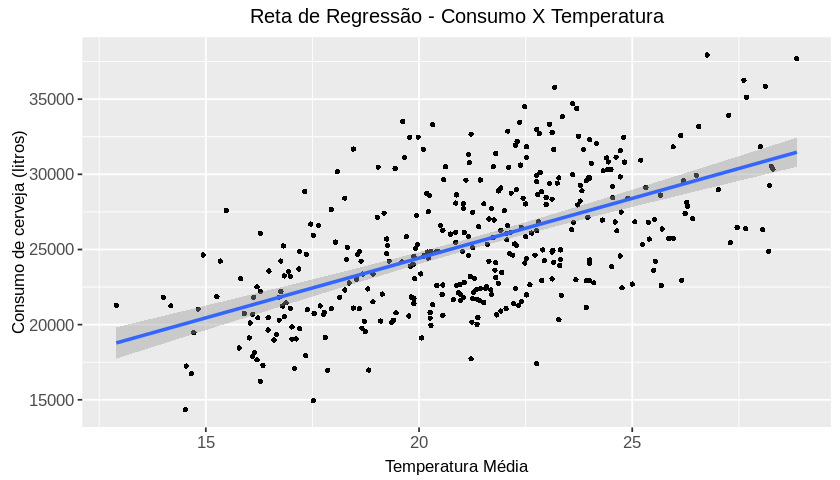

In [68]:
ggplot(data = dados, aes(x = X, y = Y)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_smooth(method = lm) +
    xlab("Temperatura Média") + 
    ylab("Consumo de cerveja (litros)") + 
    ggtitle('Reta de Regressão - Consumo X Temperatura') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### <font color='red'>Utilizando a matriz de correlação</font>

In [21]:
cor(dados)

,Y,X
Y,1.0000000,0.5746147
X,0.5746147,1.0000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: SIM

É possível quantificar a intensidade dessa relação?

Resp.: BOA

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: NÃO

### Estime o modelo de regressão linear simples

In [25]:
resultado_regressao = lm(formula = Y~X, dados)
resultado_regressao


Call:
lm(formula = Y ~ X, data = dados)

Coefficients:
(Intercept)            X  
     8528.9        794.9  


### Visualize o resultado da regressão

In [26]:
coefficients(resultado_regressao)

(Intercept)           X 
  8528.9073    794.8825

### Obtenha o $Y$ previsto

In [73]:
dados['Y_estimado'] = resultado_regressao$fitted.values
head(dados)

,Y,X,Residuos,Y_estimado
,<int>,<dbl>,<dbl>,<dbl>
1,25461,27.30,-4768.201,30229.20
2,28972,27.02,-1034.633,30006.63
3,30814,24.82,2556.108,28257.89
4,29799,23.98,2208.809,27590.19
5,28900,23.82,1436.991,27463.01
6,28218,23.78,786.786,27431.21


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [72]:
predict(resultado_regressao, data.frame(X = 42))

1 
41913.97

### Obtenha os resíduos da regressão

In [74]:
dados['Residuos'] = resultado_regressao$residuals
head(dados)

,Y,X,Residuos,Y_estimado
,<int>,<dbl>,<dbl>,<dbl>
1,25461,27.30,-4768.201,30229.20
2,28972,27.02,-1034.633,30006.63
3,30814,24.82,2556.108,28257.89
4,29799,23.98,2208.809,27590.19
5,28900,23.82,1436.991,27463.01
6,28218,23.78,786.786,27431.21


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

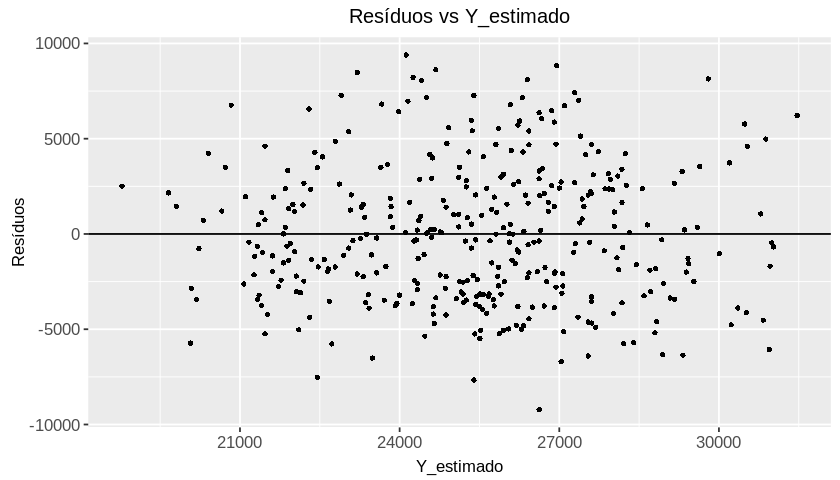

In [75]:
ggplot(data = dados, aes(x = Y_estimado, y = Residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("Y_estimado") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Y_estimado') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10)
    )

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$


In [32]:
anova = anova(resultado_regressao)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,2325899487,2325899487,178.9383,1.866747e-33
Residuals,363,4718394688,12998332,NA,NA


In [34]:
SQR = anova['X', 'Sum Sq']
SQR

[1] 2325899487

In [35]:
SQE = anova['Residuals', 'Sum Sq']
SQE

[1] 4718394688

In [36]:
SQT = SQR + SQE
SQT

[1] 7044294175

In [37]:
R_2 = SQR/SQT
R_2

[1] 0.330182

In [39]:
resumo = summary(resultado_regressao)
resumo

resumo$r.squared


Call:
lm(formula = Y ~ X, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-9221.4 -2845.5  -315.3  2409.0  9392.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8528.91    1275.36   6.687  8.6e-11 ***
X             794.88      59.42  13.377  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3605 on 363 degrees of freedom
Multiple R-squared:  0.3302,	Adjusted R-squared:  0.3283 
F-statistic: 178.9 on 1 and 363 DF,  p-value: < 2.2e-16


[1] 0.330182